In [1]:
import pandas as pd
import numpy as np
from benchmarks import *
import glob
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt

ROOT_DIR /usr/WS2/bolet1/lassen-benchmarks/exploreHyperparams


In [2]:
# for each of the programs/prob sizes in the explorData directory,
# load up all their CSV data

os.chdir(ROOT_DIR+'/explorData')

# extract the names and problem sizes of the done codes
dirs = list(os.listdir())

dirs.sort()

doneRuns = {}

for dir in dirs:
	progname = dir.split('-')[0]
	probsize = dir.split('-')[1]

	allJobs = glob.glob('./'+dir+'/allUniquePointsToSample.csv')[0]
	doneFiles = glob.glob('./'+dir+'/*/complete.csv')

	allData = pd.read_csv(allJobs)

	doneData = pd.DataFrame(columns=['xtime']+list(allData.columns))

	# join all the done files into one csv
	for doneFile in doneFiles:
		comp = pd.read_csv(doneFile)
		doneData = pd.concat([doneData, comp], ignore_index=True)

	doneData = doneData.reset_index(drop=True)

	# we remove this line just to get the plots up
	doneData = doneData[doneData['xtime'] != -1.0]

	# if we have all the data, let's analyze it
	if doneData.shape[0] == allData.shape[0]:
		print(progname, probsize, end='\t')
		print(doneData.shape, allData.shape, 'all samples collected!')
		doneRuns[dir] = {'progname':progname, 'probsize': probsize, 'df':doneData}
	else:
		print('\t', progname, probsize, end='\t')
		print('incomplete data! Collected', doneData.shape[0], '/', allData.shape[0], 'samples')





bfs_rodinia lrgprob	(3564, 7) (3564, 6) all samples collected!
bfs_rodinia medprob	(3564, 7) (3564, 6) all samples collected!
bfs_rodinia smlprob	(3564, 7) (3564, 6) all samples collected!
	 bt_nas lrgprob	incomplete data! Collected 3330 / 3564 samples
bt_nas medprob	(3564, 7) (3564, 6) all samples collected!
bt_nas smlprob	(3564, 7) (3564, 6) all samples collected!
cfd_rodinia lrgprob	(3564, 7) (3564, 6) all samples collected!
cfd_rodinia medprob	(3564, 7) (3564, 6) all samples collected!
cfd_rodinia smlprob	(3564, 7) (3564, 6) all samples collected!
cg_nas lrgprob	(3564, 7) (3564, 6) all samples collected!
cg_nas medprob	(3564, 7) (3564, 6) all samples collected!
cg_nas smlprob	(3564, 7) (3564, 6) all samples collected!
ft_nas lrgprob	(3564, 7) (3564, 6) all samples collected!
ft_nas medprob	(3564, 7) (3564, 6) all samples collected!
ft_nas smlprob	(3564, 7) (3564, 6) all samples collected!
	 hpcg lrgprob	incomplete data! Collected 3563 / 3564 samples
hpcg medprob	(3564, 7) (3564, 6)

bfs_rodinia lrgprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
145               20         close      cores     guided,8  0.027668
144               20         close      cores    guided,64  0.027958
139               20         close      cores     guided,1  0.028032
146               20         close      cores       static  0.028066
143               20         close      cores   guided,512  0.028919
255               20        spread    threads     guided,8  0.028960
142               20         close      cores    guided,32  0.029336
251               20        spread    threads   guided,256  0.029341
256               20        spread    threads       static  0.029354
151               20         close      cores   static,512  0.029374
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
1070              160         close      cores       static  0.148700
1092              160         close    sockets       static  0.290589
1114       

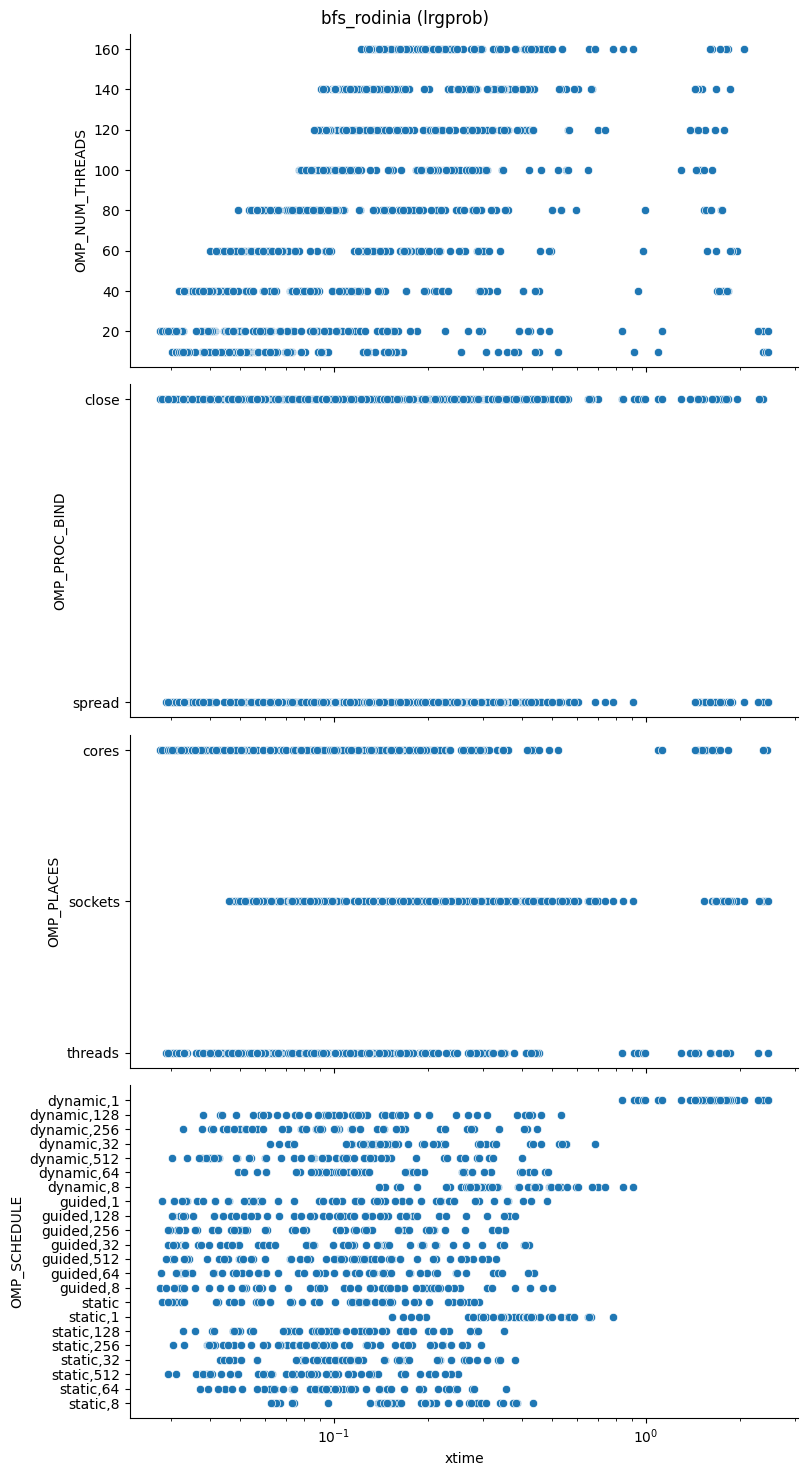

bfs_rodinia medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
122               10        spread    threads    guided,64  0.019645
7                 10         close      cores     guided,1  0.019768
11                10         close      cores   guided,512  0.019791
9                 10         close      cores   guided,256  0.019939
129               10        spread    threads   static,512  0.019983
127               10        spread    threads   static,256  0.020241
118               10        spread    threads   guided,128  0.020251
117               10        spread    threads     guided,1  0.020347
121               10        spread    threads   guided,512  0.020403
58                10         close    threads       static  0.020517
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
1070              160         close      cores       static  0.123034
1092              160         close    sockets       static  0.091854
1114       

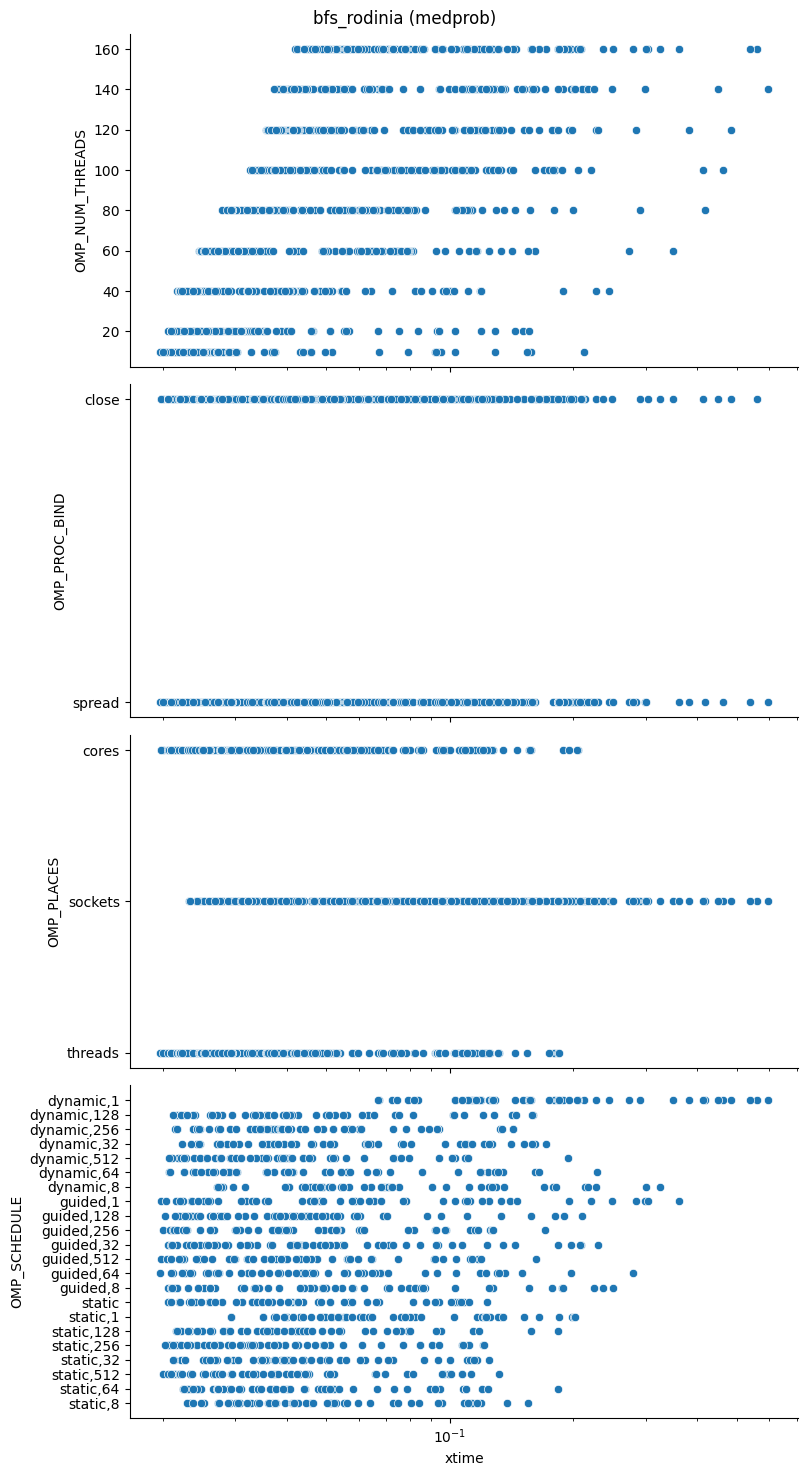

bfs_rodinia smlprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
58                10         close    threads       static  0.018126
60                10         close    threads   static,128  0.018227
64                10         close    threads    static,64  0.018350
61                10         close    threads   static,256  0.018388
56                10         close    threads    guided,64  0.018408
63                10         close    threads   static,512  0.018424
57                10         close    threads     guided,8  0.018433
62                10         close    threads    static,32  0.018527
126               10        spread    threads   static,128  0.018533
65                10         close    threads     static,8  0.018574
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
1070              160         close      cores       static  0.043760
1092              160         close    sockets       static  0.131985
1114       

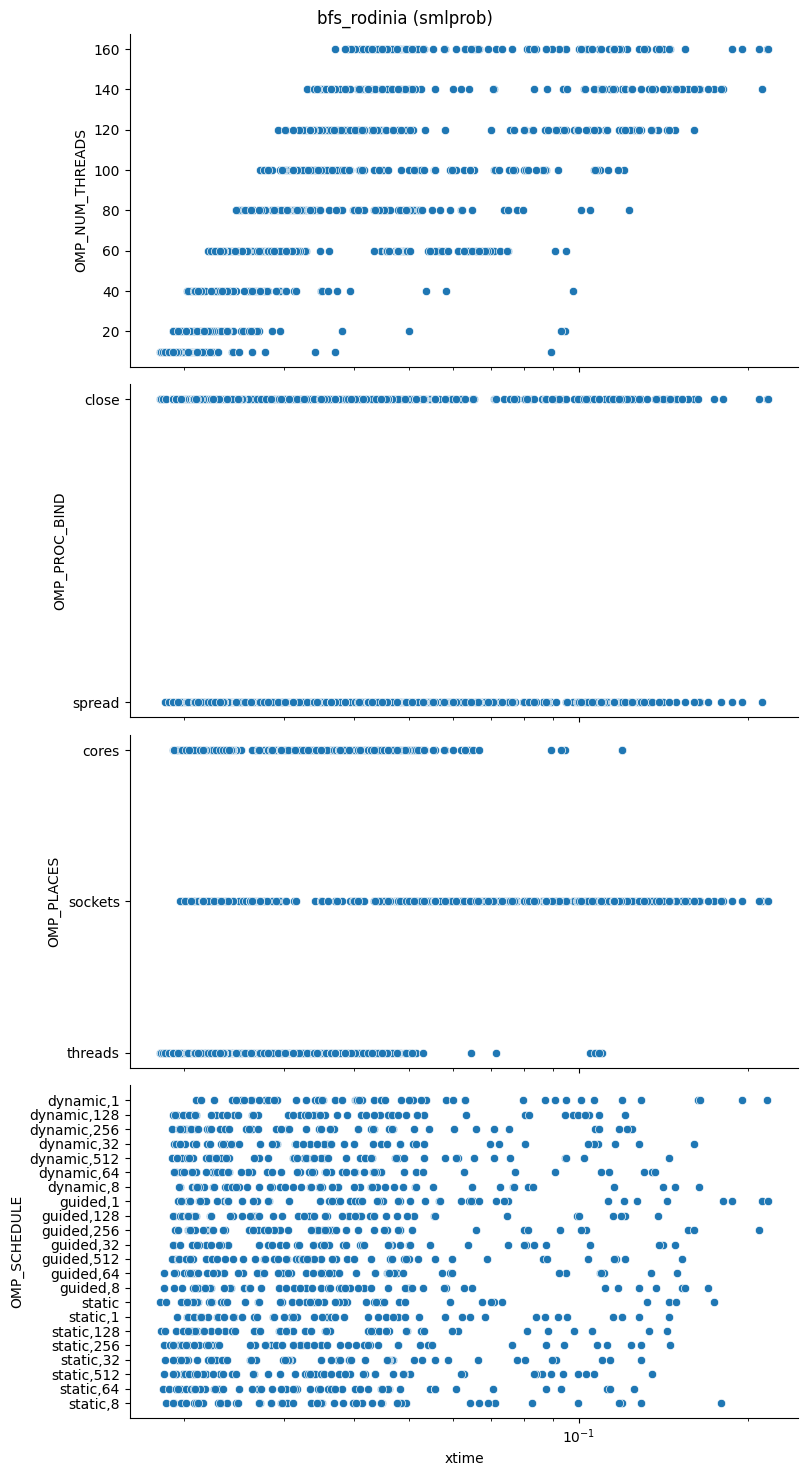

bt_nas medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
506               60        spread    threads    dynamic,1  44.653333
513               60        spread    threads     guided,1  44.746667
462               60        spread      cores    dynamic,1  45.436667
403               60         close      cores     guided,1  45.560000
396               60         close      cores    dynamic,1  45.746667
469               60        spread      cores     guided,1  45.763333
359               40        spread    sockets     guided,1  46.876667
286               40         close    sockets    dynamic,1  47.140000
381               40        spread    threads     guided,1  47.613333
337               40        spread      cores     guided,1  48.026667
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
1070              160         close      cores       static  65.790000
1092              160         close    sockets       static  64.873333
11

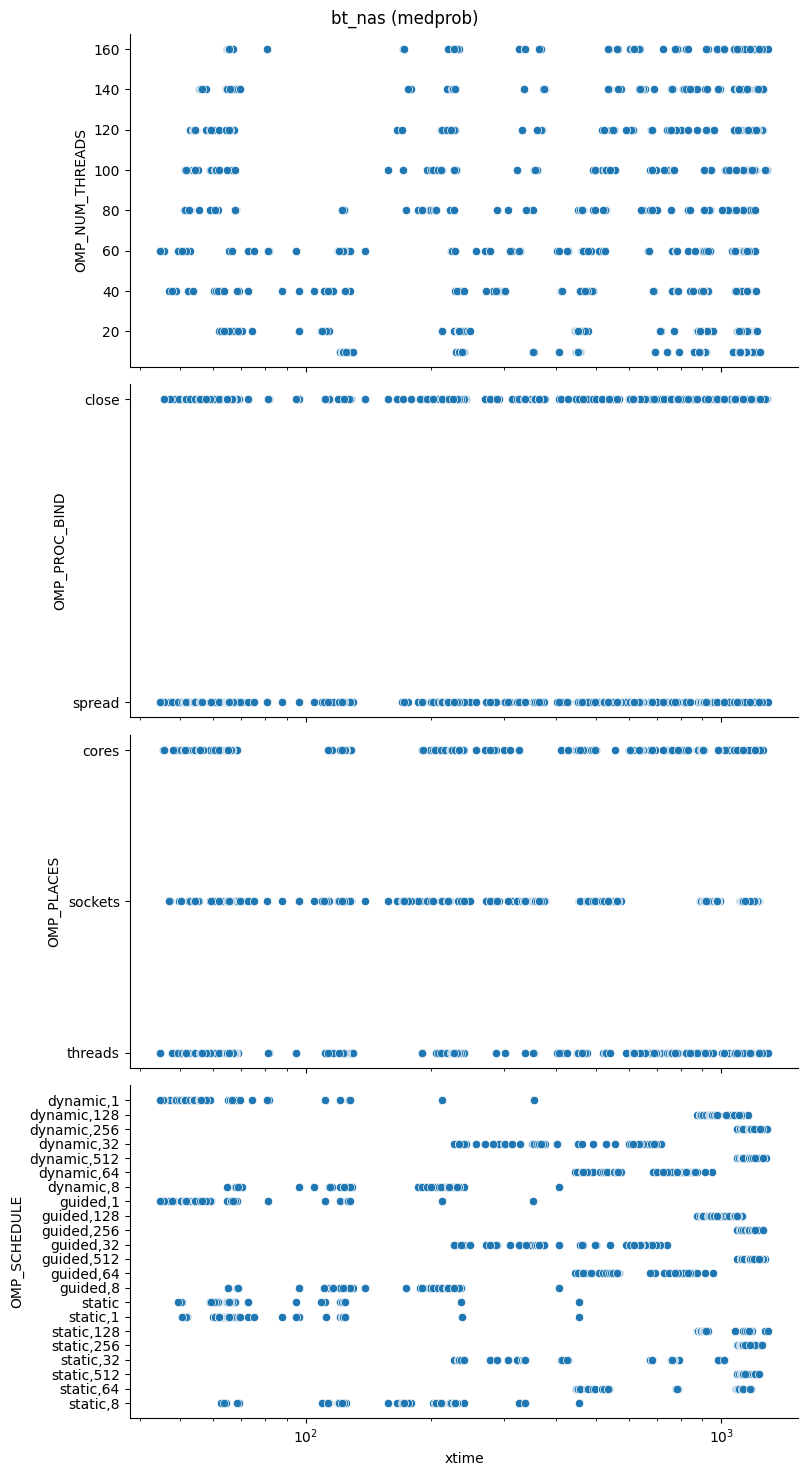

bt_nas smlprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
506               60        spread    threads    dynamic,1  10.933333
513               60        spread    threads     guided,1  11.093333
396               60         close      cores    dynamic,1  11.233333
469               60        spread      cores     guided,1  11.280000
403               60         close      cores     guided,1  11.296667
462               60        spread      cores    dynamic,1  11.306667
784              100        spread    threads       static  11.310000
785              100        spread    threads     static,1  11.330000
293               40         close    sockets     guided,1  11.366667
675              100         close      cores     static,1  11.490000
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
1070              160         close      cores       static  25.706667
1092              160         close    sockets       static  26.330000
11

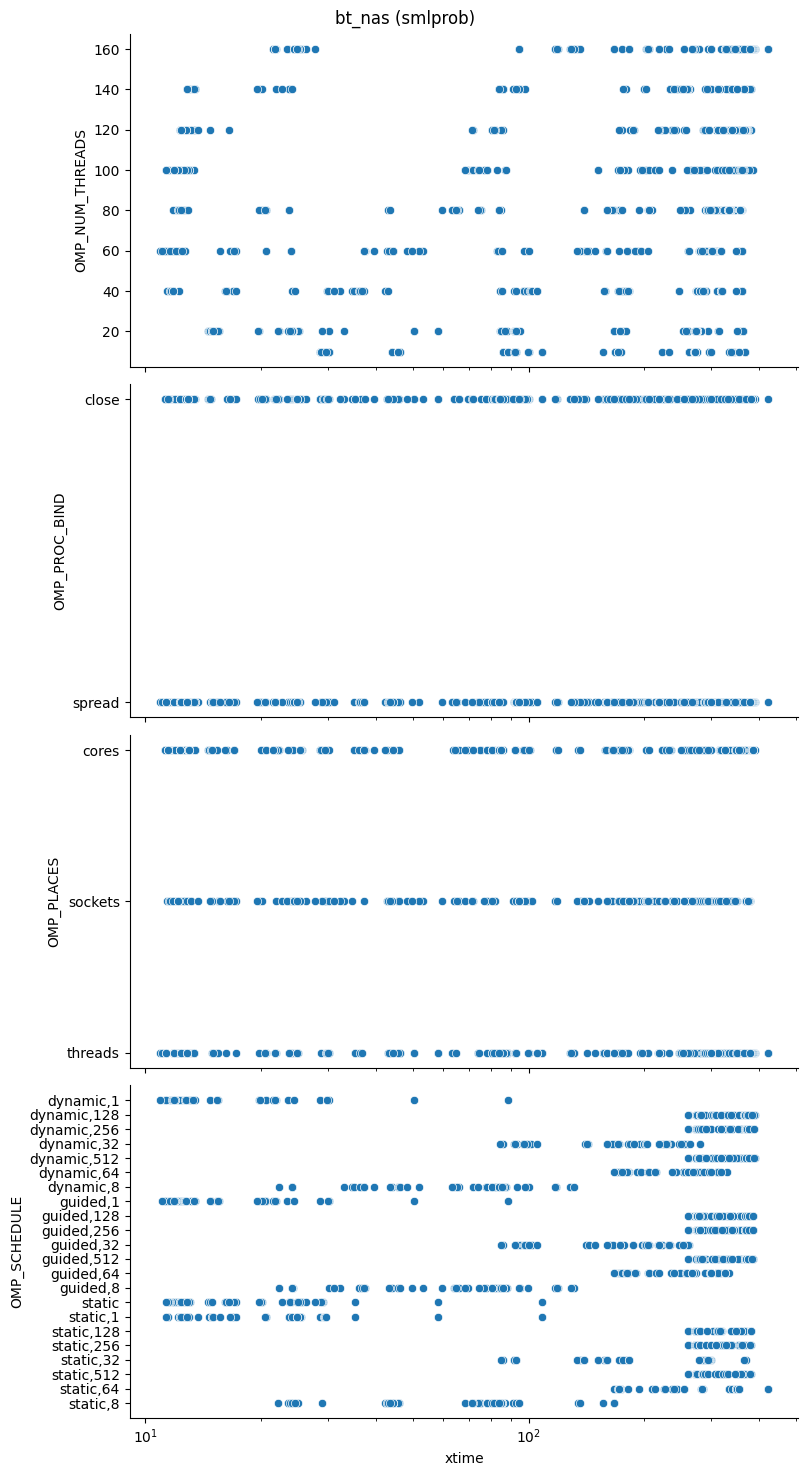

cfd_rodinia lrgprob
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
938               140         close      cores       static  25.258167
1048              140        spread    threads       static  25.305233
1004              140        spread      cores       static  25.314433
982               140         close    threads       static  25.348700
872               120        spread      cores       static  28.543533
806               120         close      cores       static  28.603433
916               120        spread    threads       static  28.819967
850               120         close    threads       static  28.924500
989               140         close    threads     static,8  29.244800
1011              140        spread      cores     static,8  29.340300
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
1070              160         close      cores       static  40.205133
1092              160         close    sockets       stat

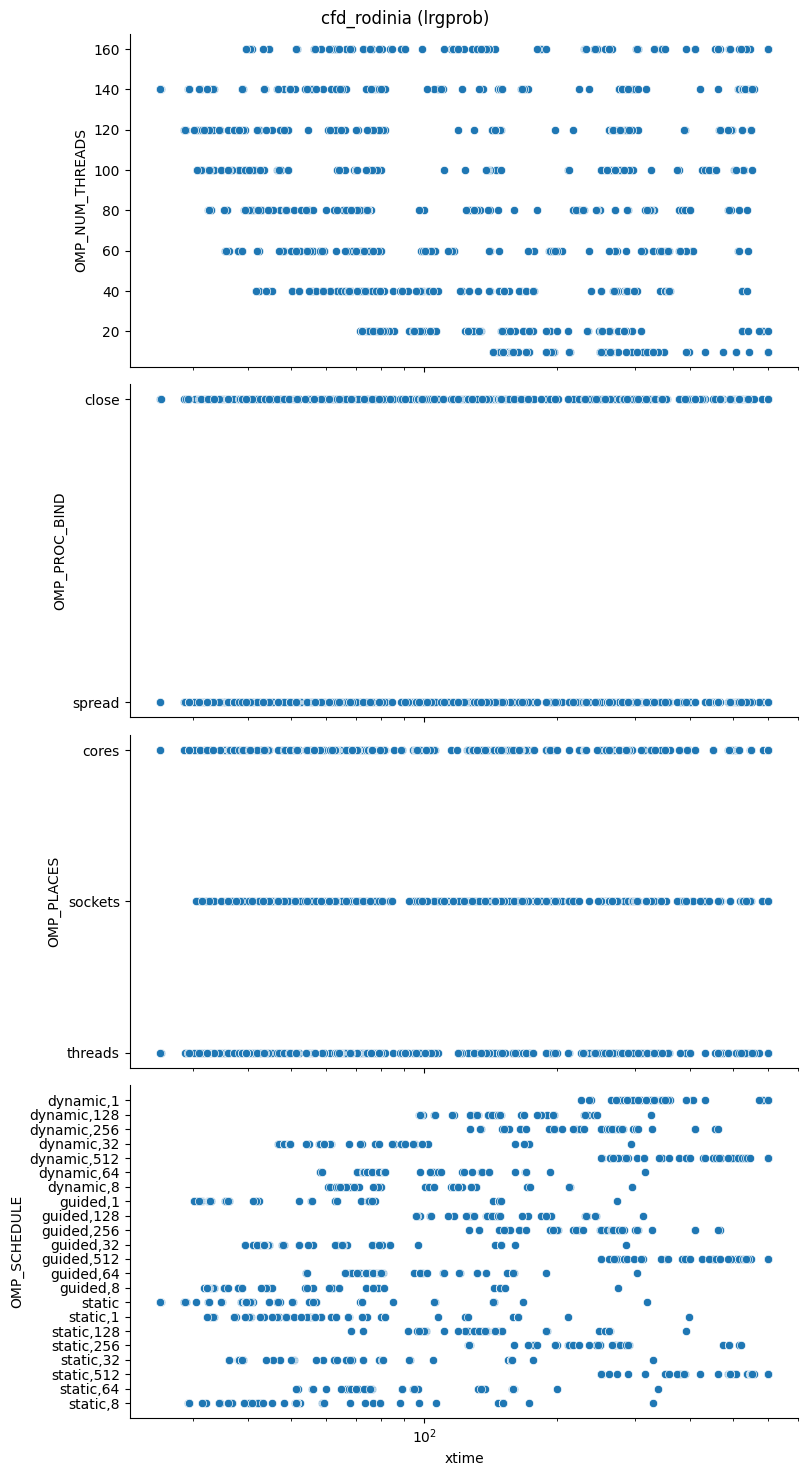

cfd_rodinia medprob
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
982               140         close    threads       static  11.892033
1004              140        spread      cores       static  11.893900
1048              140        spread    threads       static  11.900367
938               140         close      cores       static  12.163433
828               120         close    sockets       static  13.755533
806               120         close      cores       static  13.845200
872               120        spread      cores       static  13.890633
916               120        spread    threads       static  13.915133
850               120         close    threads       static  14.178267
894               120        spread    sockets       static  14.188533
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
1070              160         close      cores       static  21.308900
1092              160         close    sockets       stat

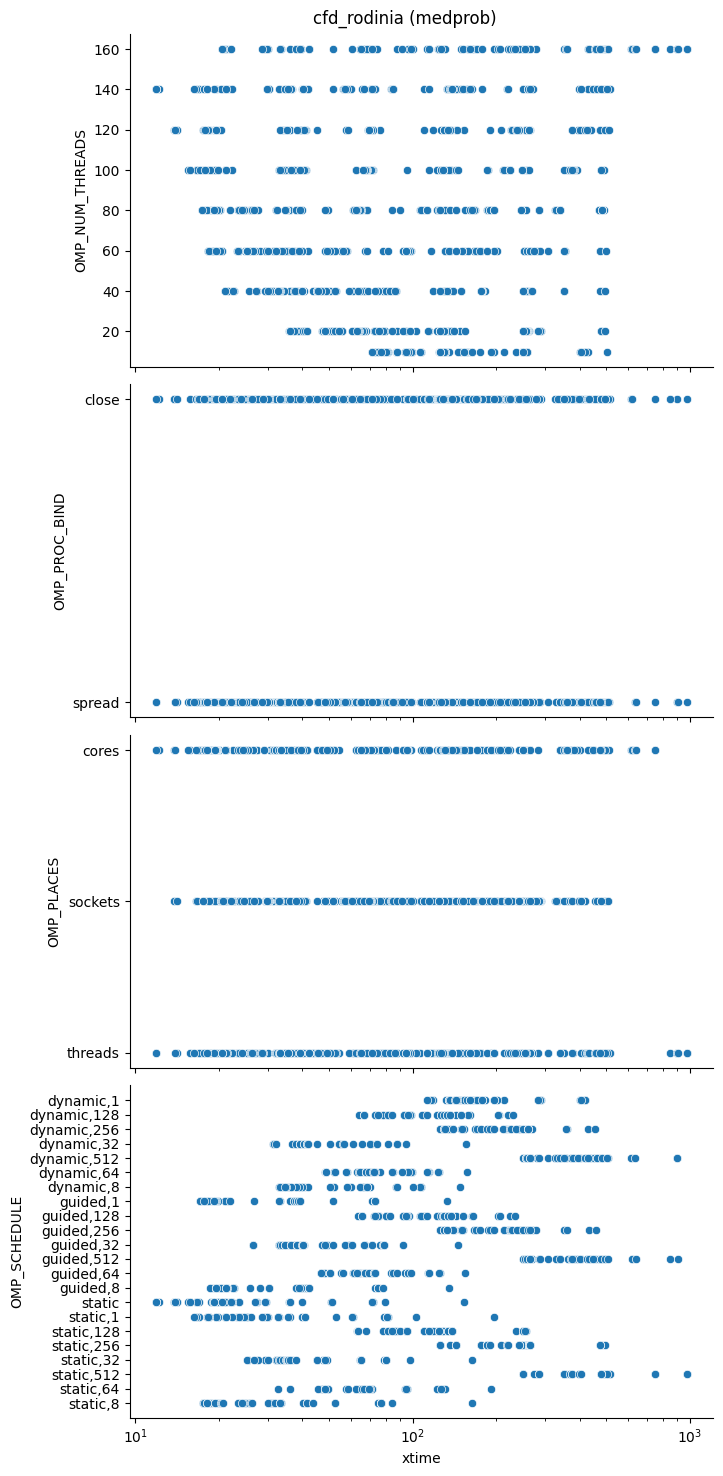

cfd_rodinia smlprob
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
872               120        spread      cores       static  3.950567
806               120         close      cores       static  3.958107
982               140         close    threads       static  3.975083
938               140         close      cores       static  3.977427
1048              140        spread    threads       static  3.980153
1004              140        spread      cores       static  3.986597
784               100        spread    threads       static  4.143897
916               120        spread    threads       static  4.152043
740               100        spread      cores       static  4.170663
674               100         close      cores       static  4.173087
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
1070              160         close      cores       static  6.580347
1092              160         close    sockets       static  7.490427


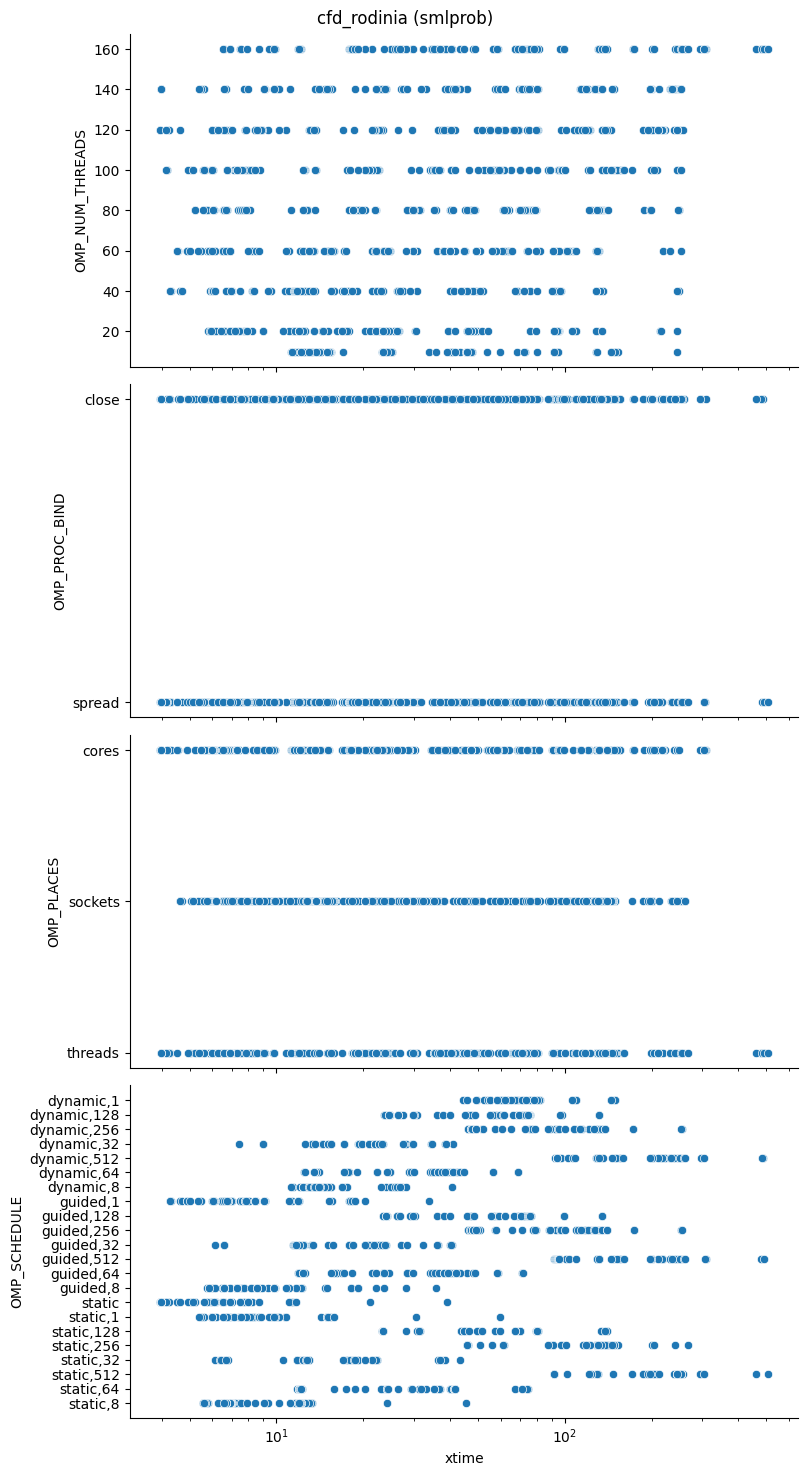

cg_nas lrgprob
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
938               140         close      cores       static  326.336667
1048              140        spread    threads       static  327.110000
982               140         close    threads       static  327.893333
941               140         close      cores   static,256  331.690000
1053              140        spread    threads   static,512  331.920000
1006              140        spread      cores   static,128  332.096667
1009              140        spread      cores   static,512  332.443333
1052              140        spread    threads    static,32  332.576667
1050              140        spread    threads   static,128  333.600000
987               140         close    threads   static,512  334.196667
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
1070              160         close      cores       static  445.690000
1092              160         close    sockets   

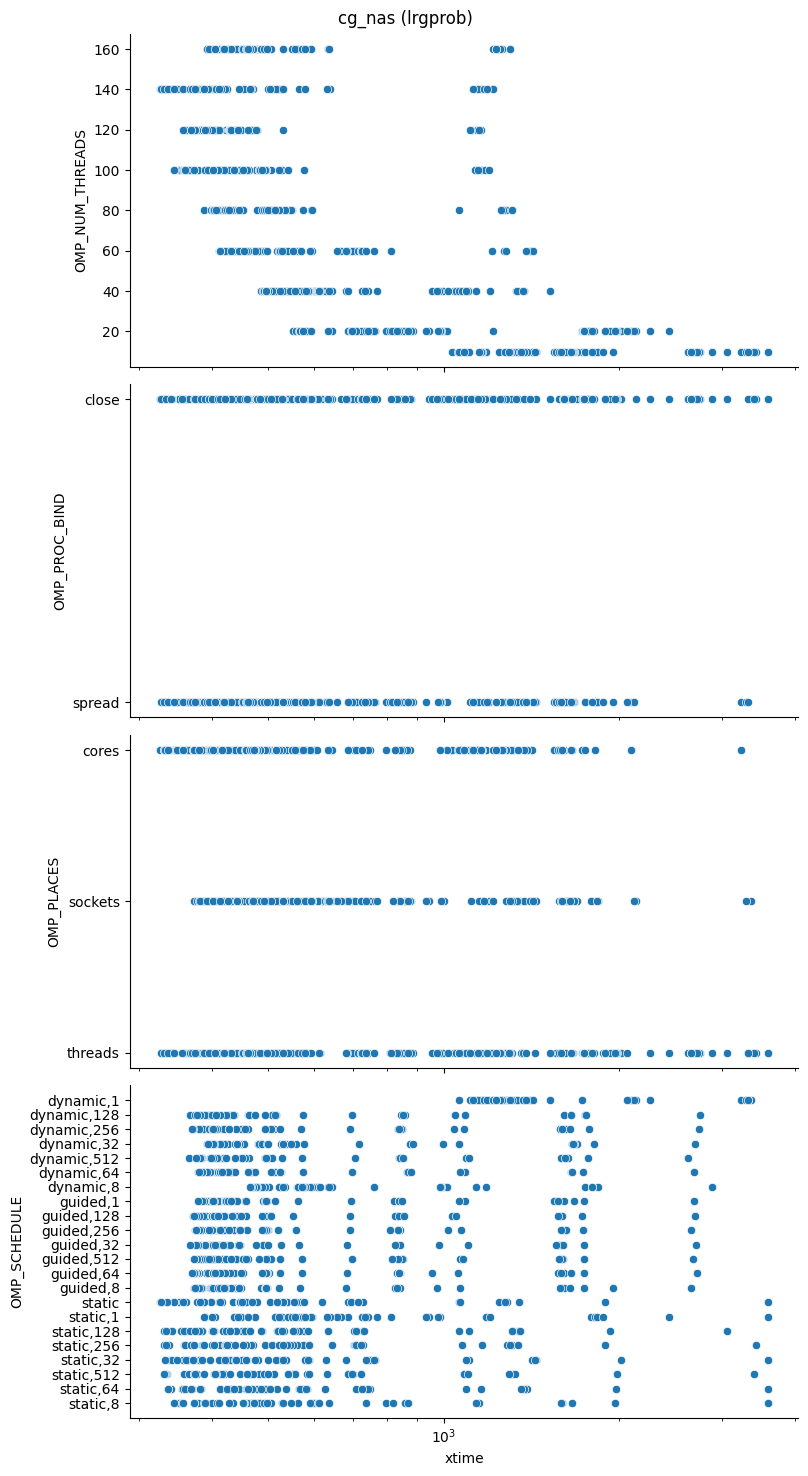

cg_nas medprob
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
1048              140        spread    threads       static  6.483333
982               140         close    threads       static  6.513333
938               140         close      cores       static  6.520000
1004              140        spread      cores       static  6.580000
944               140         close      cores    static,64  6.956667
1010              140        spread      cores    static,64  6.973333
1054              140        spread    threads    static,64  6.980000
1006              140        spread      cores   static,128  7.086667
988               140         close    threads    static,64  7.103333
784               100        spread    threads       static  7.126667
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
1070              160         close      cores       static  11.466667
1092              160         close    sockets       static  11.680000
11

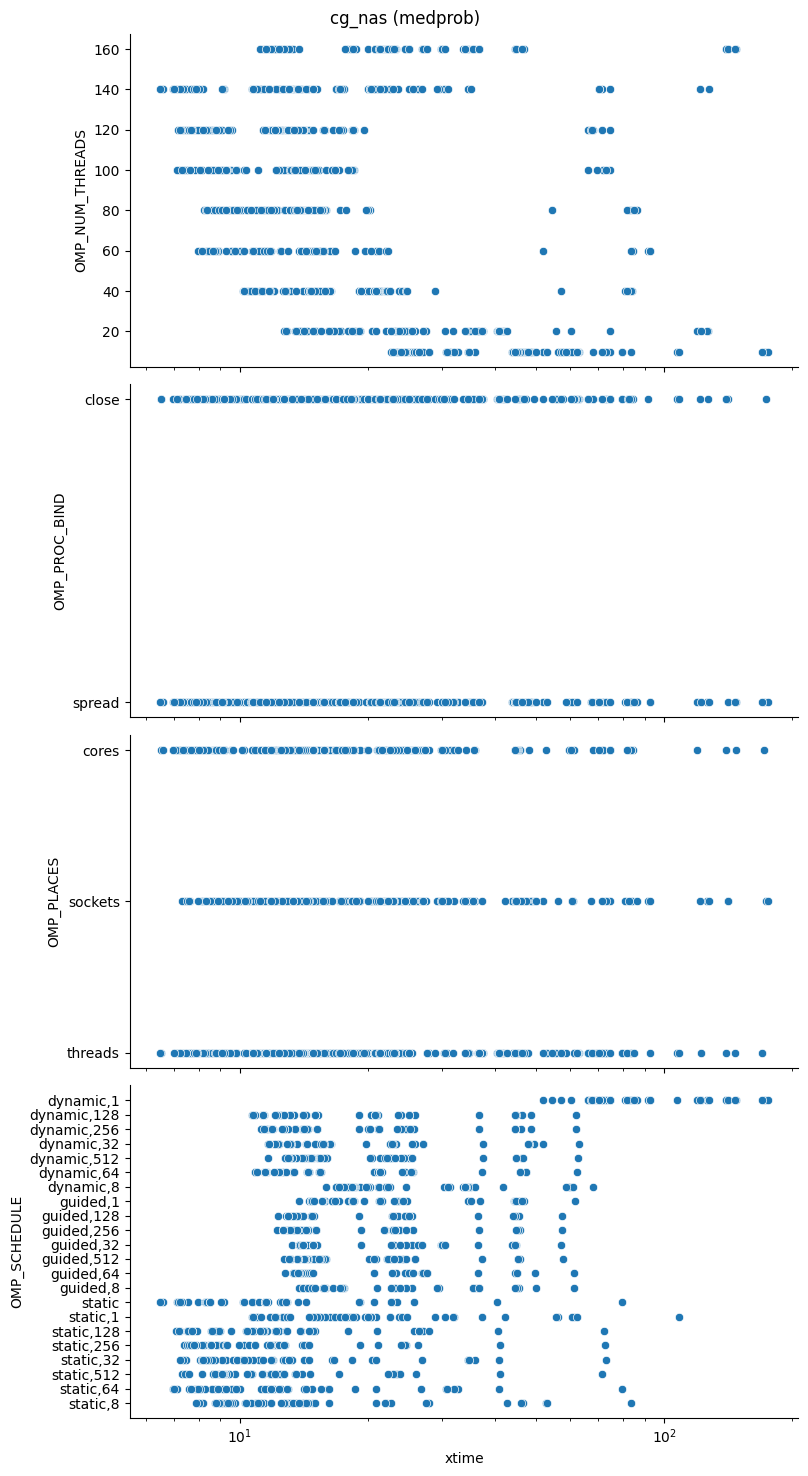

cg_nas smlprob
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
1048              140        spread    threads       static  1.880000
982               140         close    threads       static  1.903333
938               140         close      cores       static  1.913333
1004              140        spread      cores       static  1.920000
784               100        spread    threads       static  2.003333
674               100         close      cores       static  2.010000
740               100        spread      cores       static  2.026667
1052              140        spread    threads    static,32  2.063333
742               100        spread      cores   static,128  2.083333
677               100         close      cores   static,256  2.086667
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
1070              160         close      cores       static  3.580000
1092              160         close    sockets       static  4.006667
1114 

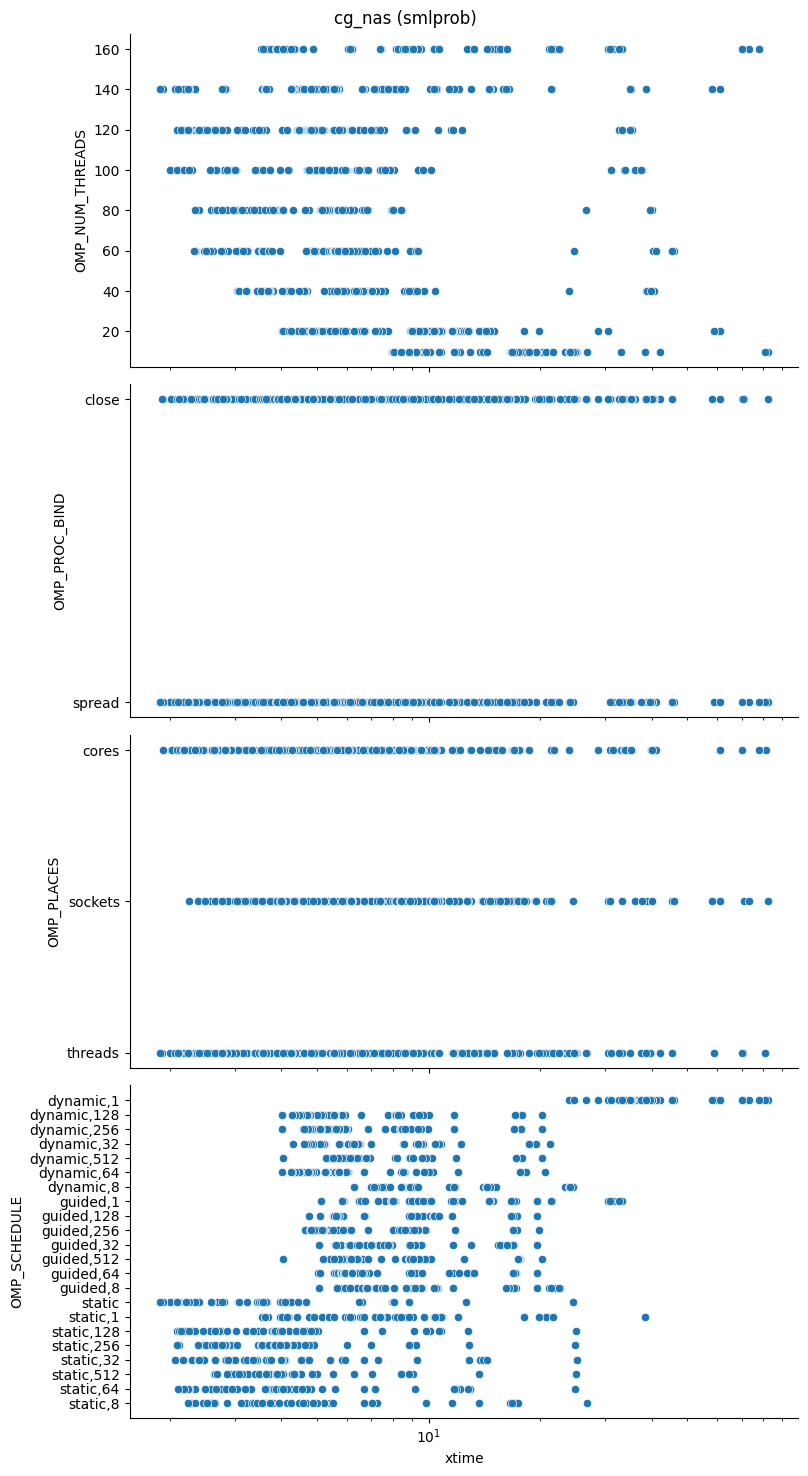

ft_nas lrgprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
469               60        spread      cores     guided,1  155.673333
359               40        spread    sockets     guided,1  156.103333
403               60         close      cores     guided,1  156.613333
293               40         close    sockets     guided,1  156.753333
264               40         close      cores    dynamic,1  157.113333
352               40        spread    sockets    dynamic,1  157.440000
374               40        spread    threads    dynamic,1  157.450000
381               40        spread    threads     guided,1  157.550000
337               40        spread      cores     guided,1  157.683333
330               40        spread      cores    dynamic,1  157.683333
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
1070              160         close      cores       static  251.473333
1092              160         close    sockets       static 

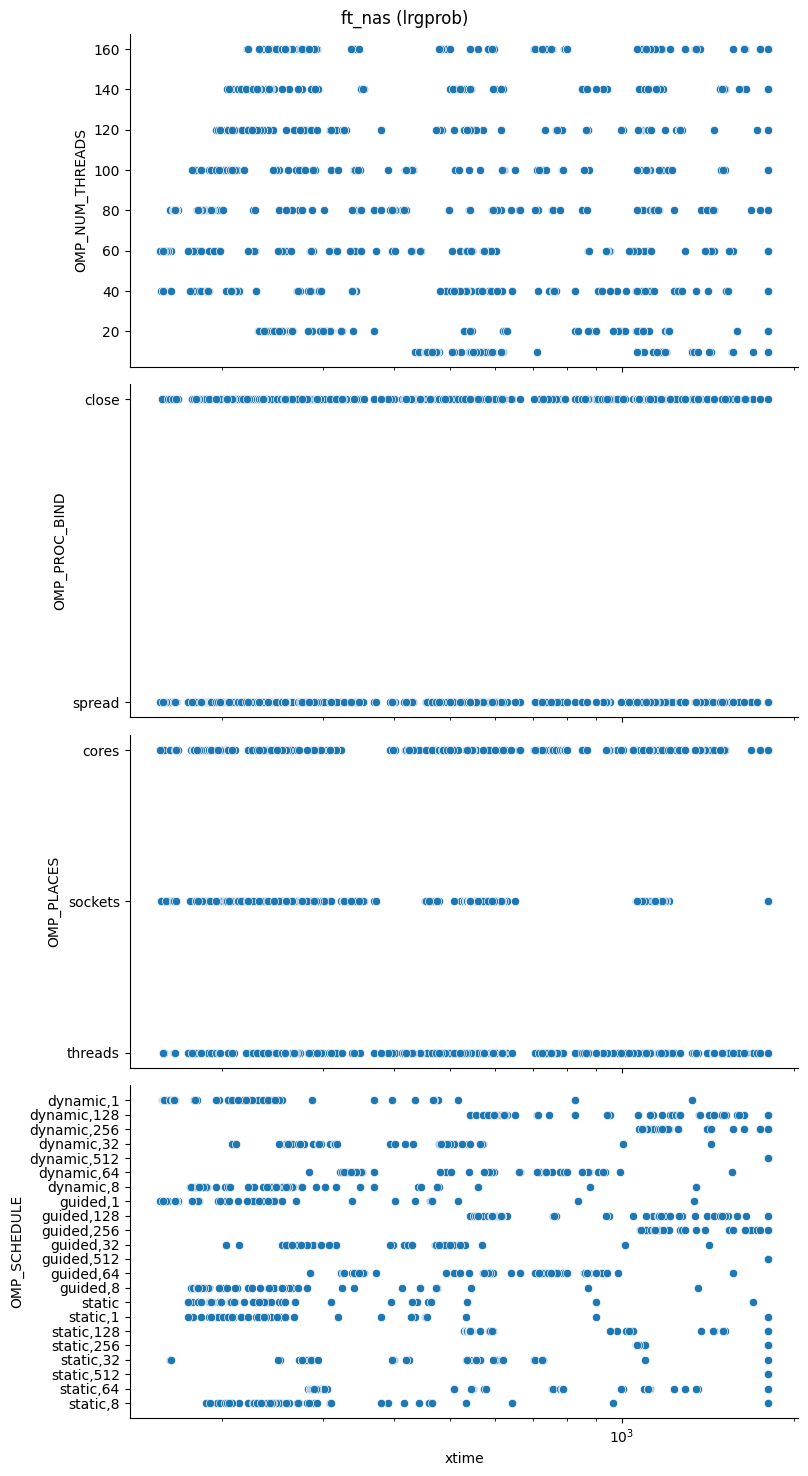

ft_nas medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
726              100        spread      cores    dynamic,1  7.113333
667              100         close      cores     guided,1  7.123333
777              100        spread    threads     guided,1  7.123333
733              100        spread      cores     guided,1  7.126667
660              100         close      cores    dynamic,1  7.146667
770              100        spread    threads    dynamic,1  7.150000
403               60         close      cores     guided,1  7.170000
902              120        spread    threads    dynamic,1  7.170000
594               80        spread      cores    dynamic,1  7.173333
469               60        spread      cores     guided,1  7.176667
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
1070              160         close      cores       static  11.793333
1092              160         close    sockets       static   9.683333
1114         

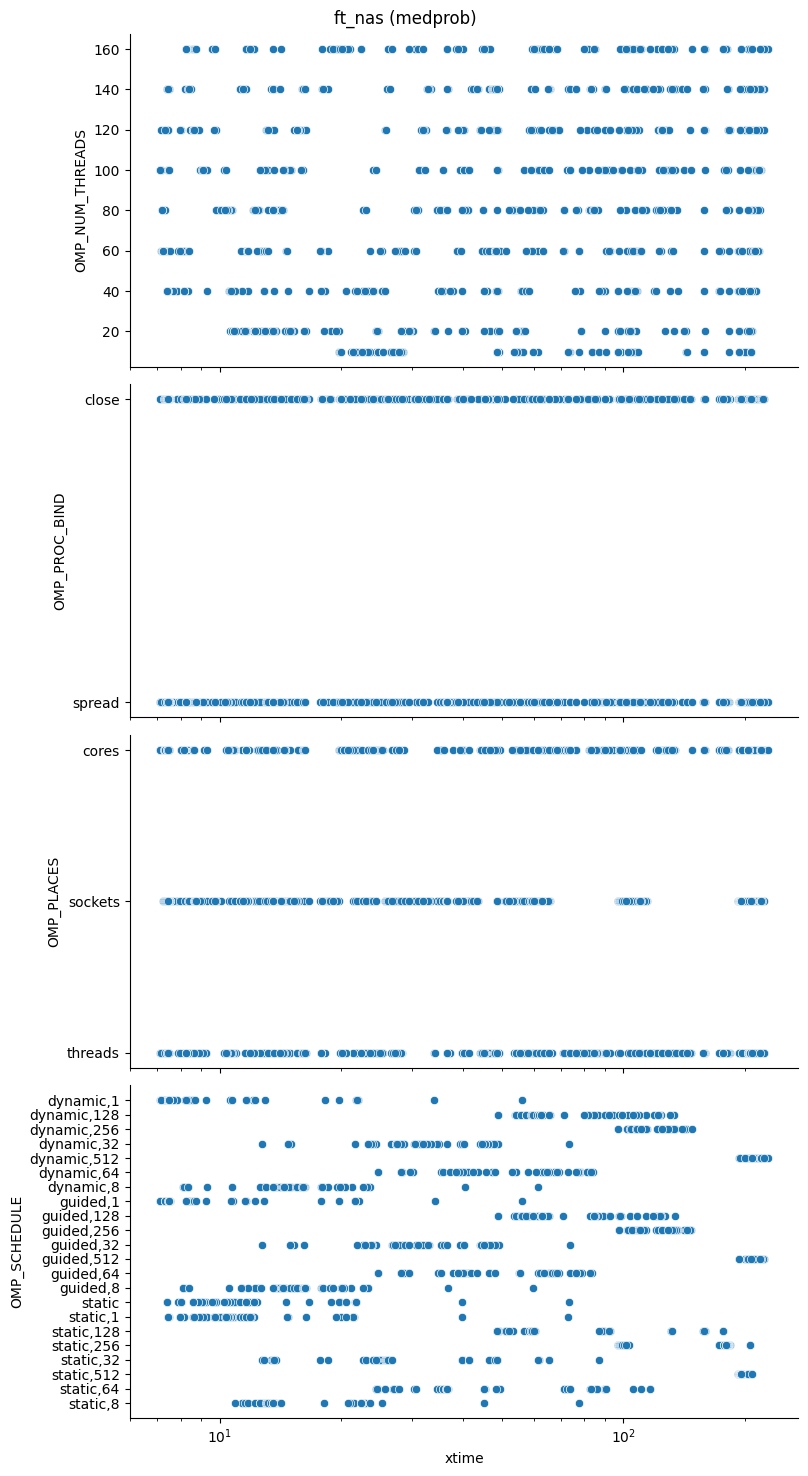

ft_nas smlprob
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
1048              140        spread    threads       static  1.730000
983               140         close    threads     static,1  1.730000
1049              140        spread    threads     static,1  1.733333
982               140         close    threads       static  1.740000
1005              140        spread      cores     static,1  1.743333
469                60        spread      cores     guided,1  1.750000
939               140         close      cores     static,1  1.753333
396                60         close      cores    dynamic,1  1.753333
403                60         close      cores     guided,1  1.753333
513                60        spread    threads     guided,1  1.753333
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
1070              160         close      cores       static  3.070000
1092              160         close    sockets       static  3.536667
1114 

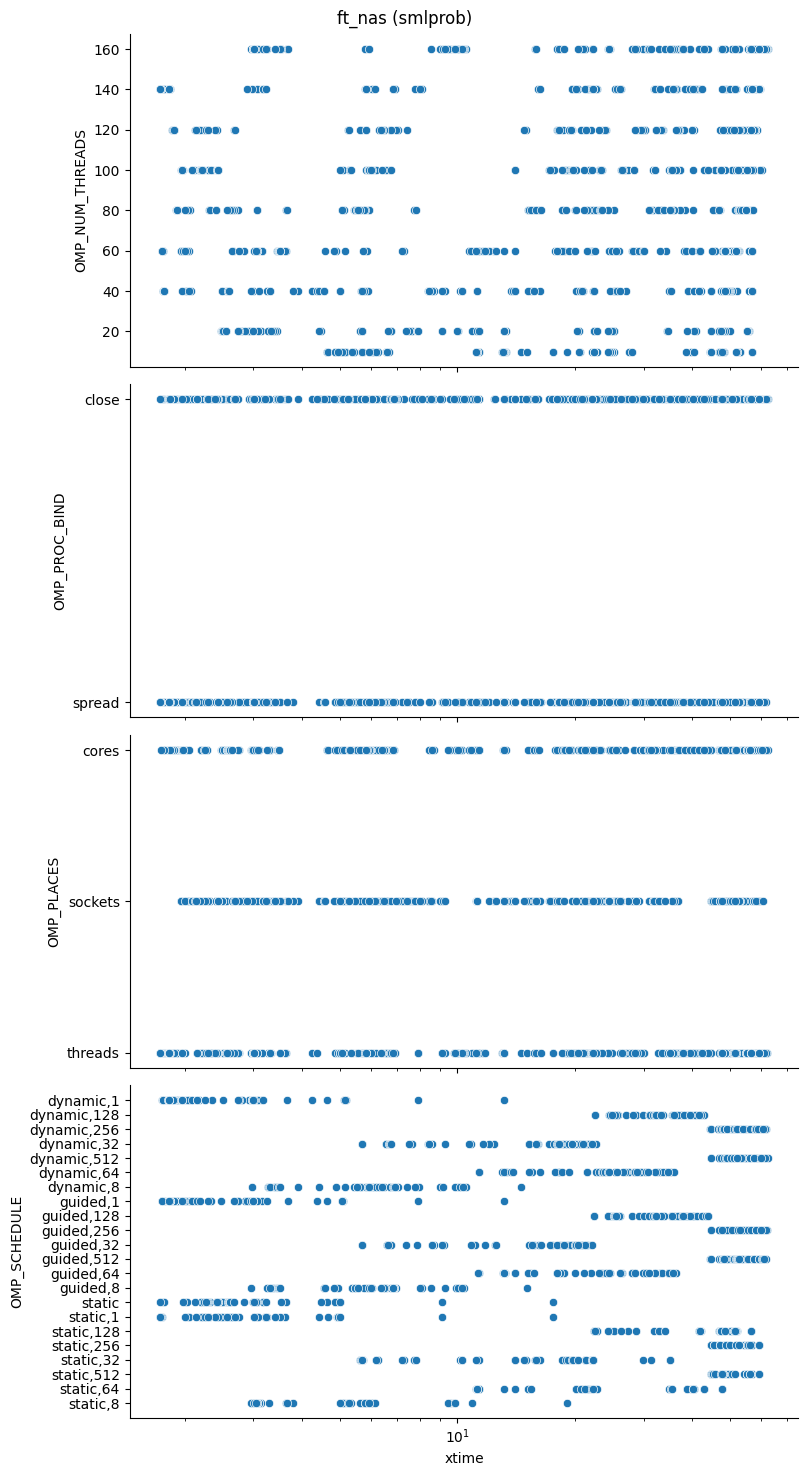

hpcg medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
11                10         close      cores   guided,512  29.378233
8                 10         close      cores   guided,128  29.409800
9                 10         close      cores   guided,256  30.465133
1                 10         close      cores  dynamic,128  31.654200
4                 10         close      cores  dynamic,512  32.042267
133               20         close      cores  dynamic,128  32.308133
2                 10         close      cores  dynamic,256  32.370500
20                10         close      cores    static,64  32.797767
136               20         close      cores  dynamic,512  32.845900
134               20         close      cores  dynamic,256  33.366667
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE  xtime
1070              160         close      cores       static  180.0
1092              160         close    sockets       static  180.0
1114            

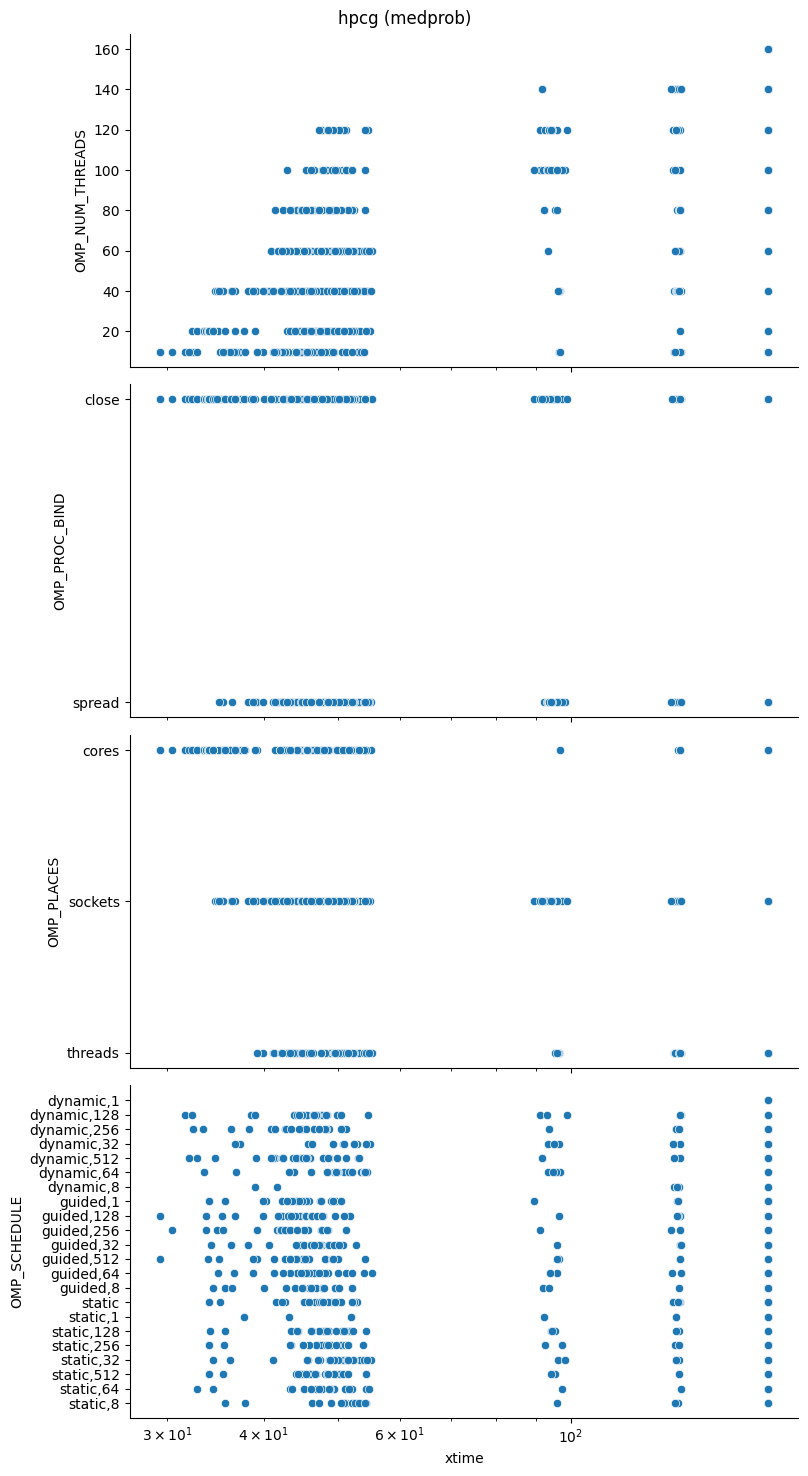

lulesh lrgprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
146               20         close      cores       static  16.732118
149               20         close      cores   static,256  18.680161
148               20         close      cores   static,128  19.118010
151               20         close      cores   static,512  20.234857
152               20         close      cores    static,64  20.725800
14                10         close      cores       static  20.837073
141               20         close      cores   guided,256  21.617302
134               20         close      cores  dynamic,256  22.702358
150               20         close      cores    static,32  22.818797
143               20         close      cores   guided,512  23.120955
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
1070              160         close      cores       static  140.445957
1092              160         close    sockets       static  143.682003

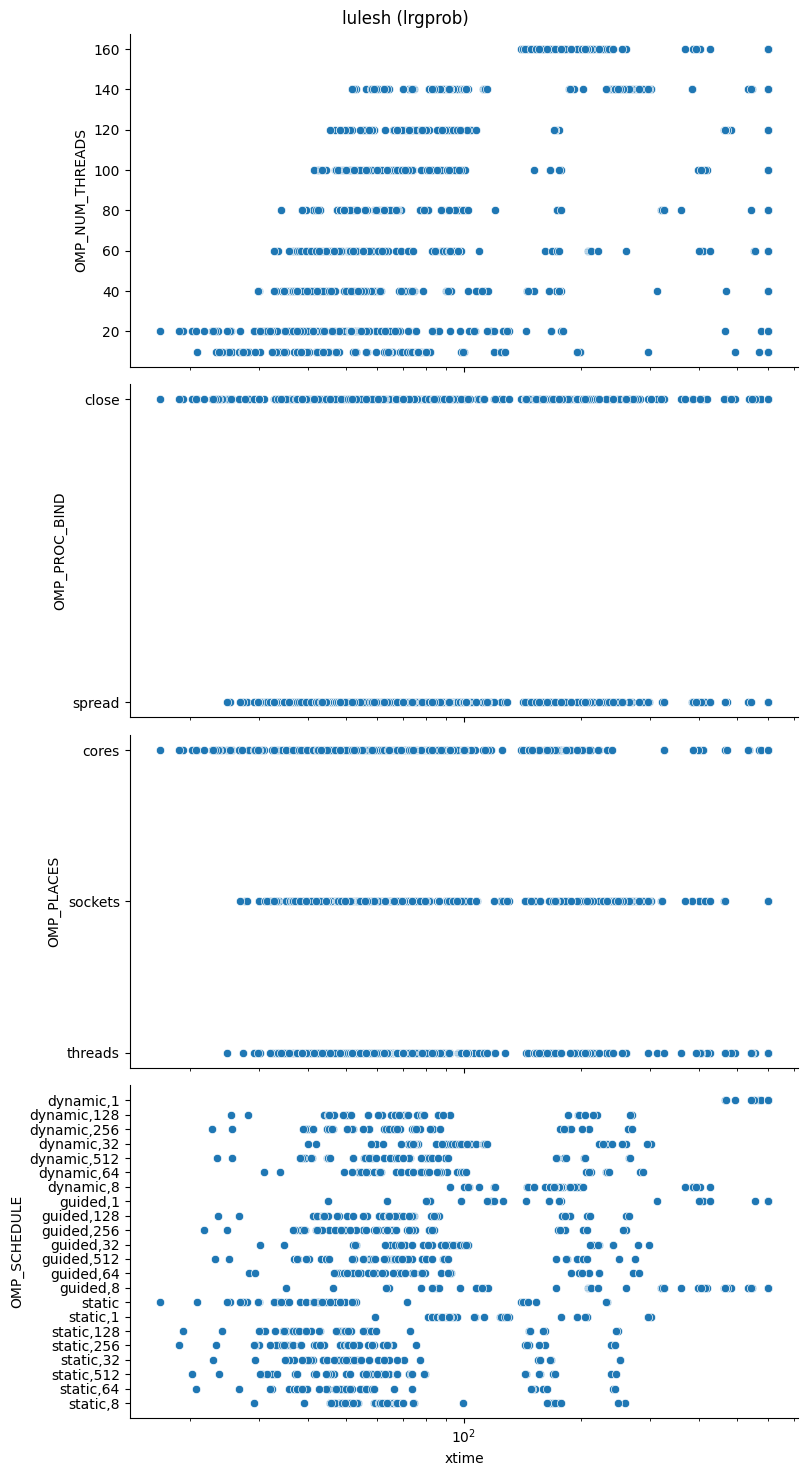

lulesh medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
14                10         close      cores       static  11.485089
146               20         close      cores       static  11.961798
16                10         close      cores   static,128  12.610770
17                10         close      cores   static,256  12.830553
20                10         close      cores    static,64  12.949288
152               20         close      cores    static,64  12.951512
148               20         close      cores   static,128  13.420771
150               20         close      cores    static,32  13.658823
149               20         close      cores   static,256  13.731494
18                10         close      cores    static,32  13.943859
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
1070              160         close      cores       static  135.212347
1092              160         close    sockets       static  136.429037

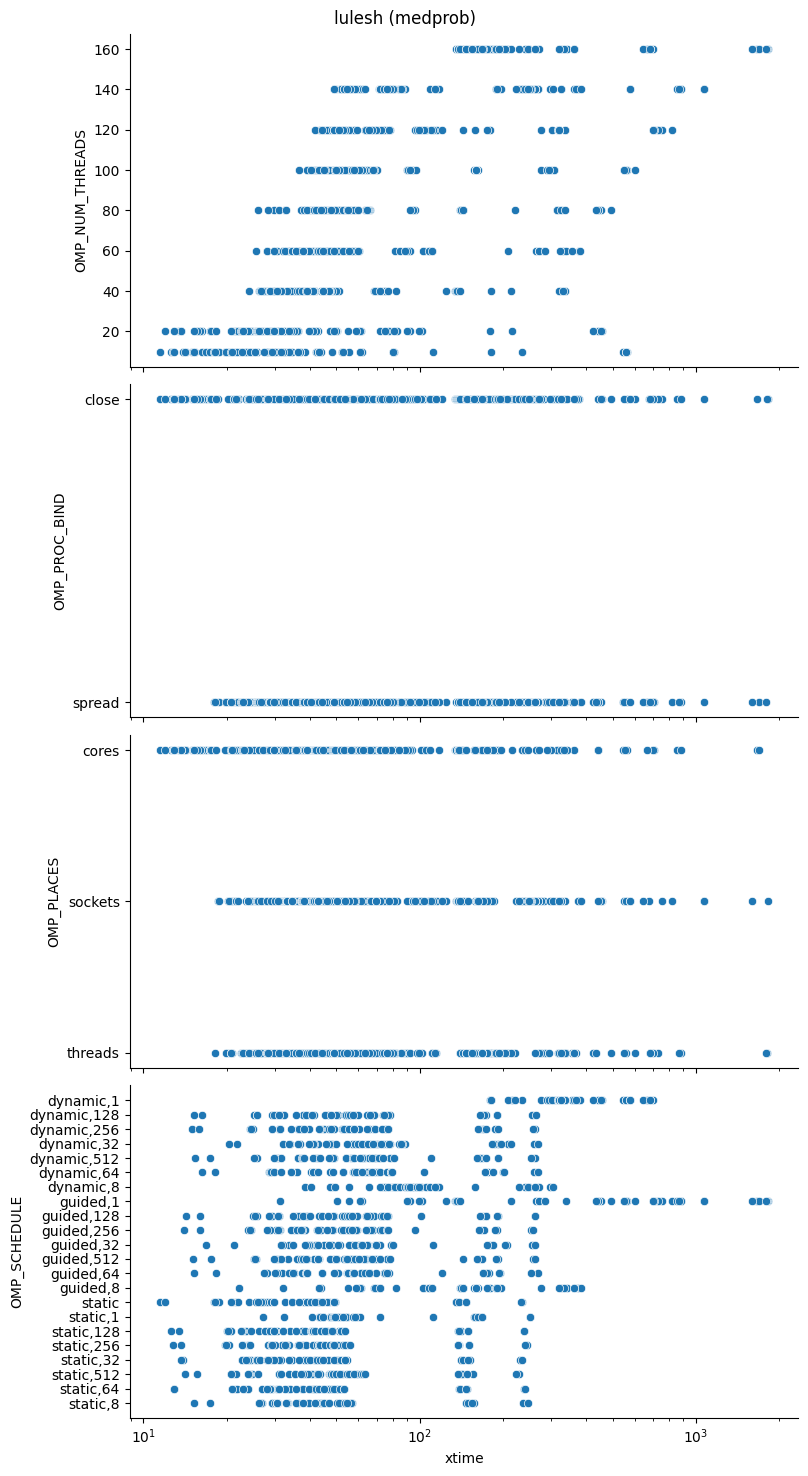

lulesh smlprob
    OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
14               10         close      cores       static  7.921444
16               10         close      cores   static,128  7.952766
20               10         close      cores    static,64  7.954915
18               10         close      cores    static,32  8.058097
17               10         close      cores   static,256  8.095029
19               10         close      cores   static,512  8.615125
21               10         close      cores     static,8  8.798600
8                10         close      cores   guided,128  9.048531
1                10         close      cores  dynamic,128  9.103525
9                10         close      cores   guided,256  9.134291
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
1070              160         close      cores       static  133.437493
1092              160         close    sockets       static  134.380127
1114              160

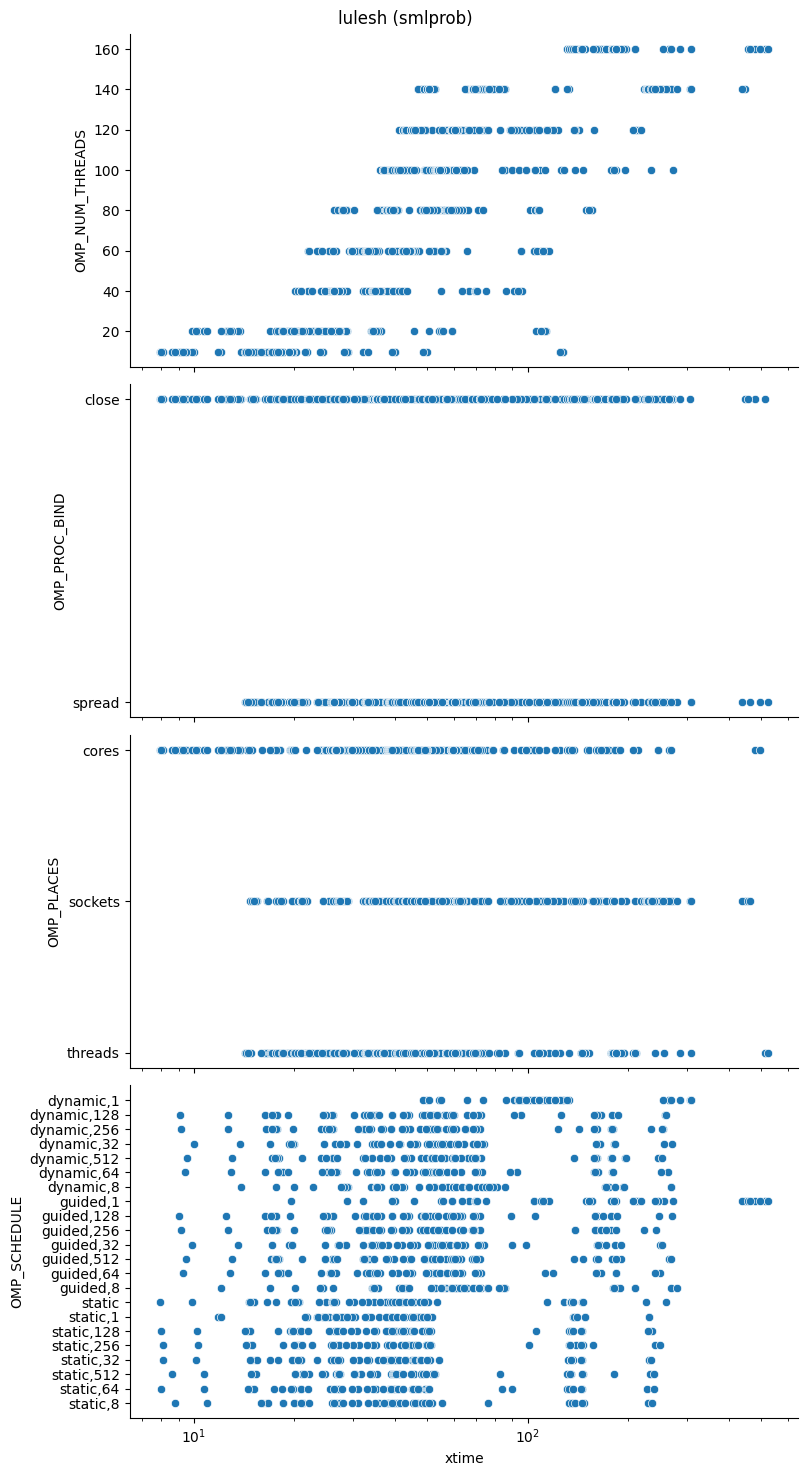

In [3]:
# for each complete run, let's plot the data

for key,values in doneRuns.items():
	progname = values['progname']
	probsize = values['probsize']
	df = values['df'].copy(deep=True)

	# drop any -1 values
	df = df[df['xtime'] != -1.0]

	# drop the progname and probsize columns
	df = df.drop(columns=['progname', 'probsize'])

	#print(df.head(), df.shape)

	hparams = list(df.columns)
	hparams.remove('xtime')

	# average out the xtimes
	avrgd = df.groupby(hparams).mean().reset_index()

	print(progname, probsize)
	# best xtime configs
	print(avrgd.sort_values(by=['xtime']).head(10))
	print(avrgd[(avrgd['OMP_NUM_THREADS'] == 160) & (avrgd['OMP_SCHEDULE'] == 'static')])

	# let's create multiple 2D plots of the xtimes
	pp = sns.pairplot(avrgd, y_vars=hparams, x_vars=['xtime']) 
	pp.fig.set_size_inches(15,15)
	pp.fig.suptitle(progname+' ('+probsize+')', x=0.7, y=0.999)

	for ax in pp.axes.flat:
		if ax.get_ylabel() in hparams:
			ax.set(xscale='log')

	plt.show()


	
	
